## The Exercise

This exercise is deceptively simple in its description: build at least two neural networks that achieve 97% or better validation accuracy on the MNIST dataset without using convolutional layers. Once you have (at least) two such networks, evaluate their performance on the test data and compare the results.

In your endeavor to achieve this result, apply the scientific method and iteratively improve your models. Start by forming a hypothesis about network architecture, specifically:

* How many layers, and how many nodes per layer should I start with?
  * Where should I apply dropout layers, and what percent dropout should I use in those layers?
  * Which activation function should I use on these layers?
* Which loss function should I use?
* Which optimizer should I use?
* Should I enable early stopping?
  * What parameters should I use related to early stopping?

Once you've made these decisions, write the code to build and train the model. Once you've trained the model and seen its validation scores, make a change to some aspect of your network (seriously consider making just one change at a time), and re-evaluate. With each change, make a note of the change and document how that change impacted performance—being explicit and documenting these impacts is not just a good scientific practice, it will help you learn and build an intuition for how changes might impact results.

Be careful not to over-generalize your findings, though. There are complex interactions between datasets, network architectures, different optimizers, and so on. What is true in one situation might be a generalizable truth, but it might be specific to the current situation as well.


In [35]:
# Setting up MNST, this should look familiar:
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

mnist_num_classes = 10 
mnist_image_size = 784

(mnist_training_images, mnist_training_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()
mnist_training_data = mnist_training_images.reshape(mnist_training_images.shape[0], mnist_image_size) 
mnist_test_data = mnist_test_images.reshape(mnist_test_images.shape[0], mnist_image_size)

mnist_training_labels = to_categorical(mnist_training_labels, mnist_num_classes)
mnist_test_labels = to_categorical(mnist_test_labels, mnist_num_classes)

In [36]:
# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model, name, time):
    figure = plt.figure()
    figure.suptitle(name)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.show()
    
    loss, accuracy  = model.evaluate(mnist_test_data, mnist_test_labels, verbose=False)
    print(f'Trained in {time} seconds')
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
    


In [37]:
# Our first model
def model_1():
    model_1 = Sequential()
    model_1.add(Dense(units=256, activation='sigmoid', input_shape=(mnist_image_size,)))
    
    for _ in range(6):
        model.add(Dense(units=128, activation='relu'))
    
    model_1.add(Dense(units=mnist_num_classes, activation='softmax'))
    
    return model_1

# Our second model:
def model_2():
    model_2 = Sequential()
    model_2.add(Dense(units=128, activation='sigmoid', input_shape=(mnist_image_size,)))
    model_2.add(Dense(units=128, activation='relu'))
    model_2.add(Dense(units=64, activation='relu'))
    model_2.add(Dense(units=32, activation='relu'))
    model_2.add(Dense(units=16, activation='relu'))
    model_2.add(Dense(units=mnist_num_classes, activation='softmax'))
    
    return model_2

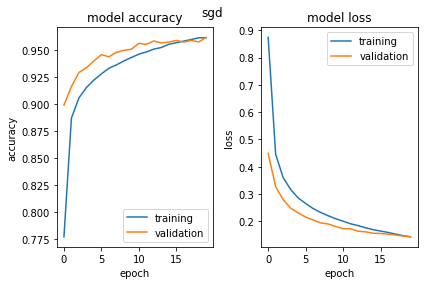

Trained in 81.140625 seconds
Test loss: 0.171
Test accuracy: 0.952


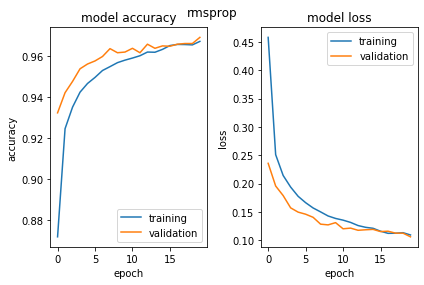

Trained in 110.484375 seconds
Test loss: 0.126
Test accuracy: 0.961


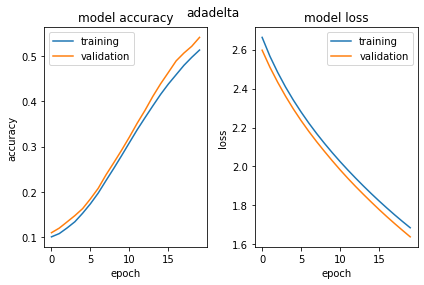

Trained in 101.640625 seconds
Test loss: 1.66
Test accuracy: 0.525


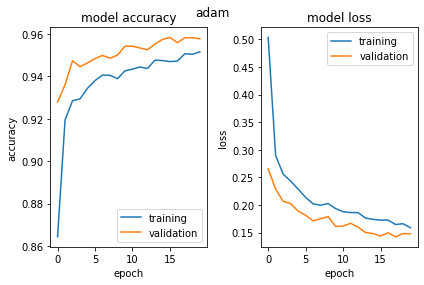

Trained in 86.65625 seconds
Test loss: 0.169
Test accuracy: 0.948


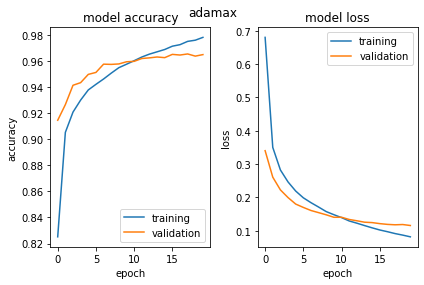

Trained in 85.015625 seconds
Test loss: 0.13
Test accuracy: 0.96


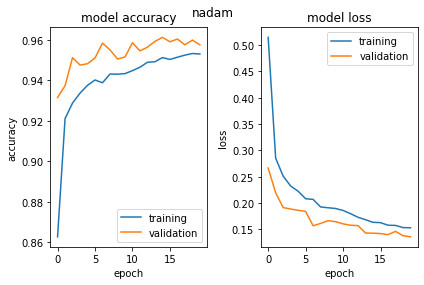

Trained in 135.125 seconds
Test loss: 0.168
Test accuracy: 0.948


In [38]:
import time # Because we care about the speed of these optimizers too!

optimizers = [
    'sgd',
    'rmsprop',
    'adadelta',
    'adam',
    'adamax',
    'nadam'
]

# So we can plot them on one chart
histories = []

for optimizer in optimizers:
    model = model_1()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    start = time.process_time()
    history = model.fit(mnist_training_data, mnist_training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
    stop = time.process_time()
    plot_training_history(history, model, optimizer, stop - start)
    histories.append(history)

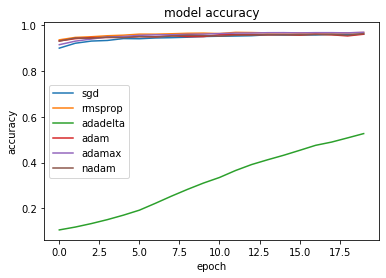

In [24]:
# Cleaner visulizations all in one place
for optimizer, history in zip(optimizers, histories):
    plt.plot(history.history['val_accuracy'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(optimizers, loc='best')
plt.show()

Note the dramatic differences between the validation accuracies! This is also a sign that this model is not excellent, otherwise more of the optimizers would work. 

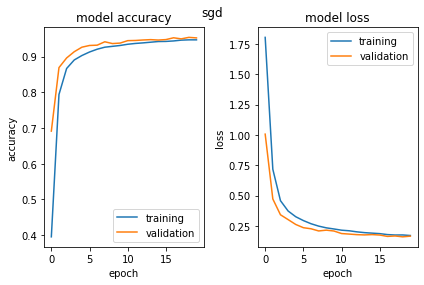

Trained in 76.671875 seconds
Test loss: 0.179
Test accuracy: 0.948


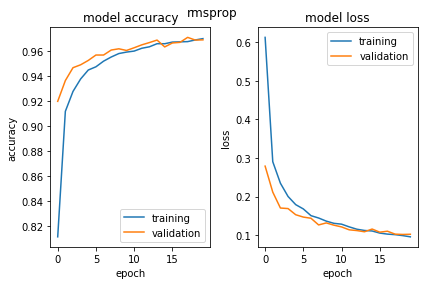

Trained in 101.46875 seconds
Test loss: 0.124
Test accuracy: 0.962


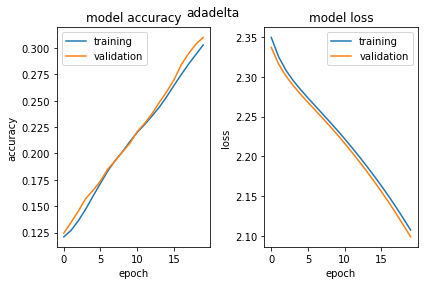

Trained in 97.46875 seconds
Test loss: 2.1
Test accuracy: 0.306


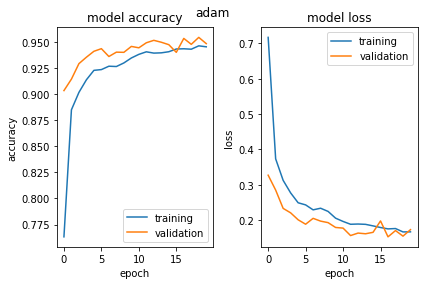

Trained in 90.859375 seconds
Test loss: 0.194
Test accuracy: 0.939


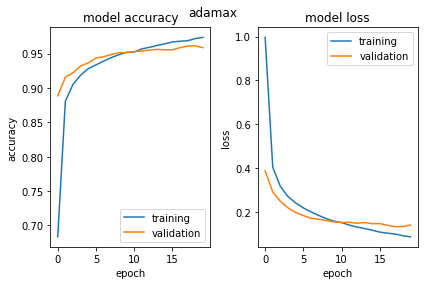

Trained in 88.15625 seconds
Test loss: 0.153
Test accuracy: 0.954


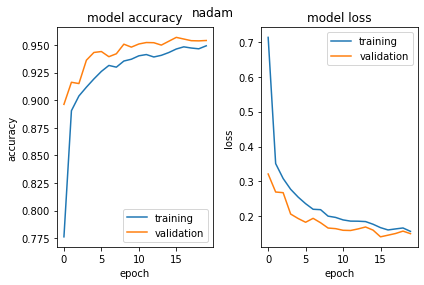

Trained in 123.953125 seconds
Test loss: 0.179
Test accuracy: 0.944


In [6]:
histories = []

for optimizer in optimizers:
    model = model_2()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    start = time.process_time()
    history = model.fit(mnist_training_data, mnist_training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
    stop = time.process_time()
    plot_training_history(history, model, optimizer, stop - start)
    histories.append(history)

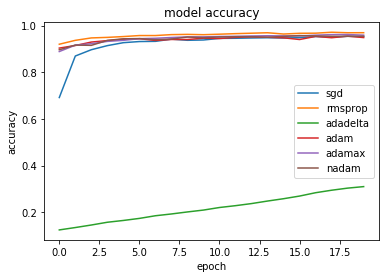

In [7]:
# Cleaner visulizations all in one place
for optimizer, history in zip(optimizers, histories):
    plt.plot(history.history['val_accuracy'])
    
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(optimizers, loc='best')
plt.show()

### for convenient operation model activation function fixed; pick rmsprop, nadam as optimizer 

In [25]:
def model_with_selective_dropout(dropout_rate, dropout_layers):
    assert dropout_layers <= 6
    
    model = Sequential()
    model.add(Dense(units=128, activation='relu', input_shape=(mnist_image_size,)))
    
    no_drop_layers = 6 - dropout_layers
    for _ in range(no_drop_layers):
        model.add(Dense(units=128, activation='relu'))
        
    for _ in range(dropout_layers):
        model.add(Dense(units=128, activation='relu'))
        model.add(Dropout(rate=dropout_rate))

    model.add(Dense(units=mnist_num_classes, activation='softmax'))
    
    return model


In [26]:
# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model):
    figure = plt.figure()

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.tight_layout()

    figure.tight_layout()
    plt.tight_layout()
    plt.show()
    
    loss, accuracy  = model.evaluate(mnist_test_data, mnist_test_labels, verbose=False)

    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

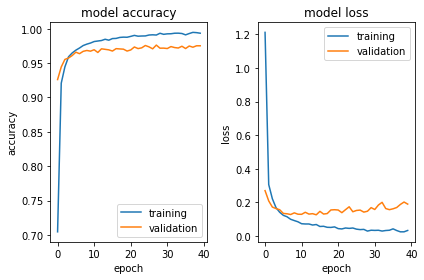

Test loss: 0.207
Test accuracy: 0.974


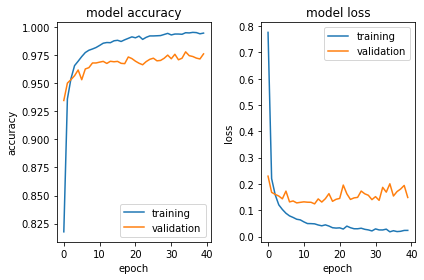

Test loss: 0.157
Test accuracy: 0.978


In [31]:
# dropout at 0.3, 0.1 rerspectively. After a couple of times to try, optimizer is nadam

batch_size = 128
validation_split = 0.2

model = model_with_selective_dropout(0.3, 3) 
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(mnist_training_data, mnist_training_labels, batch_size=batch_size, epochs=40, verbose=False, validation_split=validation_split)
plot_training_history(history, model)


model = model_with_selective_dropout(0.1, 2)
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(mnist_training_data, mnist_training_labels, batch_size=batch_size, epochs=40, verbose=False, validation_split=validation_split)
plot_training_history(history, model)

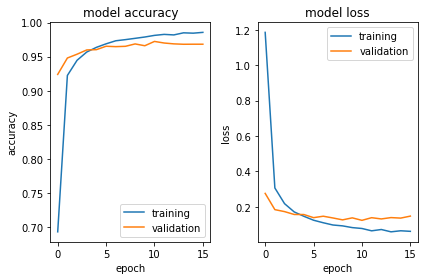

Test loss: 0.114
Test accuracy: 0.974


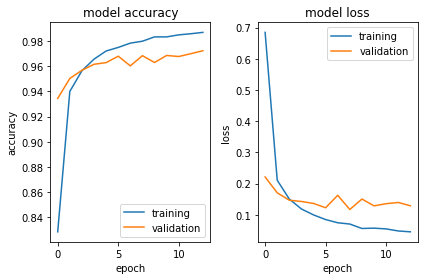

Test loss: 0.112
Test accuracy: 0.97


In [33]:
# dropout at 0.2, 0.1 respectively. optimizer is nadam

from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

batch_size = 128
validation_split = 0.2

model = model_with_selective_dropout(0.3, 3) 
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(mnist_training_data,
                    mnist_training_labels,
                    batch_size=batch_size,
                    epochs=40,
                    verbose=False,
                    validation_split=validation_split,
                    callbacks=[early_stopper])

plot_training_history(history, model)

# And the second model...
model = model_with_selective_dropout(0.1, 2)
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(mnist_training_data,
                    mnist_training_labels,
                    batch_size=batch_size,
                    epochs=40,
                    verbose=False,
                    validation_split=validation_split,
                    callbacks=[early_stopper])

plot_training_history(history, model)

# Summary:

model used:

model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(mnist_image_size,)))
    
no_drop_layers = 6 - dropout_layers
for _ in range(no_drop_layers):
    model.add(Dense(units=128, activation='relu'))
        
for _ in range(dropout_layers):
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(rate=dropout_rate))

model.add(Dense(units=mnist_num_classes, activation='softmax'))
    
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])    

## Test accuracy is reached with dropout, and ALSO after adding Early Stopping; Early Stopping did not help with the improvement of test data accuracy.